In [1]:
NAME = "Annie Dang"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [2]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



--2020-11-05 02:15:34--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.88.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.88.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  74.2MB/s    in 22s     

2020-11-05 02:15:57 (71.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
word_vectors = model.wv
del model
#Replace 0 with the code / value; Do not delete this cell
similarity_pair1 = word_vectors.similarity('France', 'England')
similarity_pair2 = word_vectors.similarity('smaller', 'bigger')
similarity_pair3 = word_vectors.similarity('England', 'London')
similarity_pair4 = word_vectors.similarity('France', 'Rocket')
similarity_pair5 = word_vectors.similarity('big', 'bigger')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [4]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [5]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = word_vectors['France'][:5]
vector_2 = word_vectors['England'][:5]
vector_3 = word_vectors['smaller'][:5]
vector_4 = word_vectors['bigger'][:5]
vector_5 = word_vectors['rocket'][:5]
vector_6 = word_vectors['big'][:5]



In [6]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [7]:
#Replace 0 with the code / value; Do not delete this cell
from scipy.spatial import distance

eu_dist1 = distance.euclidean(word_vectors['France'], word_vectors['England'])
eu_dist2 = distance.euclidean(word_vectors['smaller'], word_vectors['bigger'])
eu_dist3 = distance.euclidean(word_vectors['England'], word_vectors['London'])
eu_dist4 = distance.euclidean(word_vectors['France'], word_vectors['Rocket'])
eu_dist5 = distance.euclidean(word_vectors['big'], word_vectors['bigger'])




In [8]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.015106678009033
1.8618743419647217
2.875283718109131
3.892071008682251
1.9586496353149414


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [9]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = word_vectors.most_similar(positive=['King', 'Queen'], negative=['Man'])[:2]
closest2 = word_vectors.most_similar(positive=['bigger', 'small'], negative=['big'])[:2]
closest3 = word_vectors.most_similar(positive=['waiting', 'run'], negative=['wait'])[:2]
closest4 = word_vectors.most_similar(positive=['Texas', 'Milwaukee'], negative=['Wisconsin'])[:2]
closest5 = 0






/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [10]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]
0


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [11]:
from nltk.cluster import KMeansClusterer
import nltk
np.random.seed(seed=42)
sampled_words = np.random.choice(list(word_vectors.vocab), size=25000, replace=False)
X = word_vectors[sampled_words]

NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

d = {'word': sampled_words, 'cluster': assigned_clusters}
df = pd.DataFrame(data=d)
for i in range(5):
  print('CLUSTER {}:'.format(i))
  print(df[df['cluster'] == i]['word'][:30], "\n")

CLUSTER 0:
4                 Scary_Scary
14          absinthe_drinkers
21     Modernist_Architecture
24                    Vapours
26                       Eito
44            Dreams_hitmaker
54        Beyonce_Wyclef_Jean
57            mullet_haircuts
60           Herbert_Kretzmer
61              Self_Hypnosis
63               Gauge_Comics
64             Isabel_Gillies
69                locust_bean
76                   Pierneef
84                       KNAC
87                   Meg_Giry
88                iron_hulled
97                 lion_roars
100                Dot_Rotten
104             coke_snorting
105               DD#.#_audio
110        Penguin_paperbacks
116        broad_brimmed_hats
120                  plumeria
126               Gino_Robair
130          Crighton_Theatre
132                   pigment
133          hand_tufted_rugs
140         hummingbird_drone
142         boxers_Micky_Ward
Name: word, dtype: object 

CLUSTER 1:
16                          Sewitsky
18           

It seems like cluster 0 involves businesses, services, or companies, such as Electronic Data Capture, GlassPoint Solar, DTE Energy Co, etc.

Cluster 1 seem to be relating to the law or legal matters. For example, Adrienne_Schwisow and Slava_Kuperstein are attorneys, the Intelligence_Surveillance_Act, homebuyers tax, requirements for individuals, etc.

Cluster 2 seem to be relating to scholars and professionals. Examples include an attorney, somebody with an MD, a sociologist/university administrator, etc.

Cluster 3 seem to be relating to political figures. Examples include democrat cheri dinovo, justice kiefel, President_Tommy_Remengesau, etc.

Cluster 4 seem to be relating to performance or the entertainment industry. Examples include, KNAC (a radio show), Danny La Rue (an entertainer), Beyonce_Wyclef_Jean, Crighton_Theatre, etc.

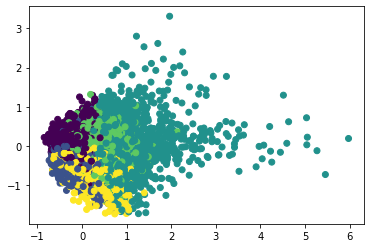

In [12]:
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_

pca = PCA(n_components=2).fit(X)
pca2 = pca.transform(X)
pl.scatter(pca2[:, 0], pca2[:, 1], c=labels);

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [13]:
# The skipgram model uses the categorical cross entropy loss, which uses a softmax activation function with cross entropy loss.
# This function minimizes the negative log likelihood that is summed for all classes. The likelihood inside the negative log is
# is described by the softmax function as the likelihood of the data belonging to a certain class


### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [14]:
print(word_vectors.most_similar(positive=['Easter', 'Thanksgiving'], negative=['Sunday'])[:2])
print(word_vectors.most_similar(positive=['Her', 'My'], negative=['Hers'])[:2])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Christmas', 0.6667991876602173), ('holiday', 0.663316011428833)]
[('His', 0.7207620143890381), ('my', 0.6178208589553833)]


## Generate embeddings from the corpus you have chosen.

In [15]:
import os
import string
import re
import pprint
from urllib.request import urlopen
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

url = "http://www.gutenberg.org/cache/epub/24923/pg24923.txt" ## Your raw text file location 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
unique_words = list(set([item for sublist in tok_corp for item in sublist]))

model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 16, window=7)

vector_list=[] 
for word in unique_words:
    vector_list.append(model[word])
print(vector_list[:5])
len(unique_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[array([ 0.05387922, -0.028422  ,  0.00654412, -0.02645147,  0.02564855,
        0.06648801, -0.05011898, -0.03072294, -0.05091984, -0.01422791,
        0.02218487,  0.01378361,  0.01216622,  0.03090402,  0.00727693,
       -0.04105026], dtype=float32), array([-0.00464922, -0.01288335, -0.01176549,  0.02044939,  0.02806616,
        0.01193518,  0.0032129 , -0.02164982, -0.00541879, -0.02642911,
        0.0147893 ,  0.04320418, -0.04501456,  0.02445959,  0.01641704,
       -0.01763284], dtype=float32), array([ 0.05603297, -0.02429933,  0.01939826, -0.0309079 , -0.00050542,
        0.08559923, -0.0179449 , -0.0138441 , -0.02694086,  0.01049261,
        0.02960868,  0.04904184, -0.02398619,  0.05152118,  0.01686197,
       -0.04436697], dtype=float32), array([ 0.21478927, -0.00615878,  0.03779635, -0.08068289,  0.2585187 ,
        0.30832168, -0.176292  , -0.09626214, -0.23651661, -0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


13562

## Hypothesis 1:
I predict that the word duck and bird will be more similar than the word duck and fish. This is because a duck is a bird and should be associated with each other, while duck has very little association with fish, other than the fact that they're animals.

In [ ]:
print(model.similarity('duck', 'bird'))
print(model.similarity('duck', 'fish'))


0.9723271
0.87855273


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


This somewhat confirms my hypothesis. Duck and Bird are 98% cosine similar, which is more so than duck and fish, but duck and fish also have very high similarity, which may come from the fact that they're both animals and were discussed together in the text.

## Hypothesis 2
I predict that dog and domestic and cat and domestic both have high cosine similarity and are close in cosine similarity to each other. This is because I think both cat and dog are associated with "domestic" and should be associated with domestic at the same level.

In [ ]:
print(model.similarity('dog', 'domestic'))
print(model.similarity('cat', 'domestic'))


0.9804577
0.9812833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


This confirms my hypothesis because both pairings have very high cosine similarities and the value of similarity is very close to each other.

## Hypothesis 3
I predict that "dog" + "domestic" - "wolf" will equal wild. Because dog is to domestic as wolf is to wild.

In [ ]:
print(model.most_similar(positive=['dog', 'domestic'], negative=['wolf'], topn=5))
for i, (word, sim) in enumerate(model.most_similar(positive=['dog', 'domestic'], negative=['wolf'], topn=1000)):
    if word == 'wild':
        print('[Rank ' + str(i) + ']','::', (word, sim))

[('all', 0.9946643114089966), ('several', 0.9919795989990234), ('one', 0.9909327030181885), ('wild', 0.9874952435493469), ('breeds', 0.9874944686889648)]
[Rank 3] :: ('wild', 0.9874952435493469)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


My hypothesis was wrong, as the words that are most similar to dog+domestic-wolf were not the words I was expecting. In fact, I did not anticipate any of these top words to be associated with dog+domestic-wolf. But,the word 'wild' which I actually expected is ranked 3rd, which is pretty high up on the list.

## Use T-SNE or PCA to reduce the dimensionality of the vectors to two dimensions

In [16]:
from sklearn.manifold import TSNE
import pandas as pd
from gensim.models import KeyedVectors

In [17]:
from google.colab.output import eval_js
from IPython.display import Javascript


In [18]:
!git clone https://github.com/CAHLR/d3-scatterplot.git

Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1022 (delta 9), reused 1 (delta 0), pack-reused 1003
Receiving objects: 100% (1022/1022), 1.94 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (590/590), done.


In [19]:
vocab_gn = list(word_vectors.vocab)
freq = [(x, word_vectors.vocab[x].count) for x in vocab_gn]

In [20]:
sorted_gn = sorted(freq, reverse=True, key=lambda d: d[1]) 
sampled_words = [f[0] for f in sorted_gn[:20000]]

In [21]:
gn_vectors=[]
for x in sampled_words:
    gn_vectors.append(word_vectors[x])

In [22]:
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(gn_vectors)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.987s...
[t-SNE] Computed neighbors for 20000 samples in 349.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

In [23]:
df1 = pd.DataFrame(data_embed)
df1['word'] = sampled_words
df1.columns = ['x', 'y', 'label']
df1.head()

#df.to_csv('d3-scatterplot/google_news.tsv', sep='\t', index=False)

,x,y,label
0,2.368474,7.460387,</s>
1,3.663816,7.725950,in
2,2.076516,8.843031,for
3,1.418135,11.168829,that
4,-4.404289,29.601891,is


In [48]:
NUM_CLUSTERS=6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)

kmeans.fit(df1[['x', 'y']])
 
labels = kmeans.labels_
df1['cluster'] = labels
df1
#df1.to_csv('d3-scatterplot/google_news.tsv', sep='\t', index=False)

,x,y,label,cluster
0,2.368474,7.460387,</s>,2
1,3.663816,7.725950,in,2
2,2.076516,8.843031,for,2
3,1.418135,11.168829,that,2
4,-4.404289,29.601891,is,4
...,...,...,...,...
19995,-24.614838,4.776856,greener,0
19996,-39.399796,1.514906,copyright_infringement,0
19997,37.479103,-52.685036,SU,1
19998,4.732991,-49.064915,McCall,1


In [49]:
df1.to_csv('d3-scatterplot/google_news.tsv', sep='\t', index=False)

In [50]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'google_news.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

In [39]:
fairy_tale_vectors=[] ## n by d matrix containing words and their respective vectors
for x in unique_words:
    fairy_tale_vectors.append(model[x])
data_embed2=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(fairy_tale_vectors)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13562 samples in 0.029s...
[t-SNE] Computed neighbors for 13562 samples in 4.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13562
[t-SNE] Computed conditional probabilities for sample 2000 / 13562
[t-SNE] Computed conditional probabilities for sample 3000 / 13562
[t-SNE] Computed conditional probabilities for sample 4000 / 13562
[t-SNE] Computed conditional probabilities for sample 5000 / 13562
[t-SNE] Computed conditional probabilities for sample 6000 / 13562
[t-SNE] Computed conditional probabilities for sample 7000 / 13562
[t-SNE] Computed conditional probabilities for sample 8000 / 13562
[t-SNE] Computed conditional probabilities for sample 9000 / 13562
[t-SNE] Computed conditional probabilities for sample 10000 / 13562
[t-SNE] Computed conditional probabilities for sample 11000 / 13562
[t-SNE] Computed conditional probabilities for sample 12000 / 13562
[t-SNE] Computed conditional probabilities for sa

In [40]:
df = pd.DataFrame(data_embed2)
df['word'] = unique_words
df.columns = ['x', 'y', 'label']
df.head()

#df.to_csv('d3-scatterplot/darwin.tsv', sep='\t', index=False)

,x,y,label
0,17.795044,6.585582,gaps
1,2.336856,-21.951586,_Chrysanthemum
2,19.270681,-3.084370,correspond
3,-43.115574,13.884892,Their
4,19.622648,40.680630,divergent


In [41]:
NUM_CLUSTERS=11
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)

kmeans.fit(df[['x', 'y']])
 
labels = kmeans.labels_
df['cluster'] = labels
df.to_csv('d3-scatterplot/darwin.tsv', sep='\t', index=False)
df

,x,y,label,cluster
0,17.795044,6.585582,gaps,7
1,2.336856,-21.951586,_Chrysanthemum,2
2,19.270681,-3.084370,correspond,7
3,-43.115574,13.884892,Their,4
4,19.622648,40.680630,divergent,1
...,...,...,...,...
13557,4.668727,23.705069,characterises,8
13558,-47.338726,9.337958,qu'on,6
13559,38.361568,-12.697835,originate,3
13560,-5.824216,50.688648,Emperor,10


In [42]:
port = 8000
data_file = 'darwin.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

![](https://drive.google.com/uc?export=view&id=1XHXV7CDhrrKMMqFV8x_yuRVZy02tX3kZ)


Coloring by 6 clusters (determined by kmeans), I was able to find groupings for the plot. Orange and blue were a little bit harder to decipher and definitely could've been broken up. The green cluster contained a lot of action words and verbs. The red cluster was clearly relating to politics, law, and institutions. The brown cluster contained a lot of locations (cities, countries, etc.). The purple cluster contained a lot of names, professional positions, and things relating to athletics or sports.

![](https://drive.google.com/uc?export=view&id=1weYrCmxXoPtHoKbOCjPKMXYcqh4-3mpc)

It was a lot harder finding meaningful clusters with this visualziation and I'm assuming that's because this is a much smaller corpus. I must note that this visualization is a very interesting shape and looks like a sideways c with a very heavy head and smaller tail. Some vague relationships I noticed were that yellow contained adjectives describing the different features of animals, light blue contains locations, and grey contains a lot of animals and their phylogenetic nomenclature. However, within these clusters contain a lot of unrelating words as well.